# Headline analysis

This notebook explores the most frequent significant words in headlines.

## Imports

In [5]:
import pandas as pd
from pandas.core.common import flatten
import matplotlib.pyplot as plt
import seaborn as sns

## Setup

In [6]:
pd.set_option("max_colwidth", 0)

## Data sourcing

In [10]:
headlines = pd.read_csv("./data/processed_headlines.csv")

headlines.head()

,title,source,keywords
0,From Gemma Collins in the diary room to jokes about hyperventilating into a paper bag: A Level students flood social media with hilarious memes as they collect their exam results,Daily Mail,gemma collins diary room joke hyperventilate paper bag level student flood social medium hilarious meme collect exam result
1,"How Michael Parkinson sparred with Muhammad Ali, fell out with Meg Ryan and enraged Helen Mirren: Talk show giant's greatest interviews as he dies at 88",Daily Mail,michael parkinson spar muhammad ali fell meg ryan enrage helen mirren talk show giant great interview die
2,Pupils fume they've been 'completely screwed over' by return to pre-Covid marking after top grades drop by 9% in a year - while universities start to run out of Clearing places as thousands miss out on their preferred choices,Daily Mail,pupil fume ve completely screw return pre-covid marking top grade drop year university start run clear place thousand miss preferred choice
3,Moment Greek tennis star Stefanos Tsitsipas confronts woman in the crowd imitating a bee to put him off his stroke every time he serves…but he still wins the match,Daily Mail,moment greek tennis star stefanos tsitsipas confronts woman crowd imitate bee put stroke every time serves…but still win match
4,The Reckoning FIRST LOOK: Steve Coogan transforms into depraved presenter Jimmy Savile ahead of new series after BBC delayed broadcast over 'fierce response from victims',Daily Mail,reckoning first look steve coogan transform deprave presenter jimmy savile ahead new series bbc delay broadcast fierce response victim


## Most frequent words

### Analysis

In [15]:
# Split the keywords strings into lists

headlines["keywords"] = headlines["keywords"].str.split(" ")

In [16]:
# Split the titles by source

dm = headlines[headlines["source"] == "Daily Mail"]
bbc = headlines[headlines["source"] == "BBC"]

In [17]:
# Flatten keyword lists

all_dm_keywords = flatten(dm["keywords"])
all_bbc_keywords = flatten(bbc["keywords"])

In [18]:
# Convert to series (makes them very countable)

all_dm_keywords = pd.Series(all_dm_keywords)
all_bbc_keywords = pd.Series(all_bbc_keywords)

# Then count them

dm_keyword_counts = all_dm_keywords.value_counts()
bbc_keyword_counts = all_bbc_keywords.value_counts()

[Text(0.5, 1.0, 'BBC')]

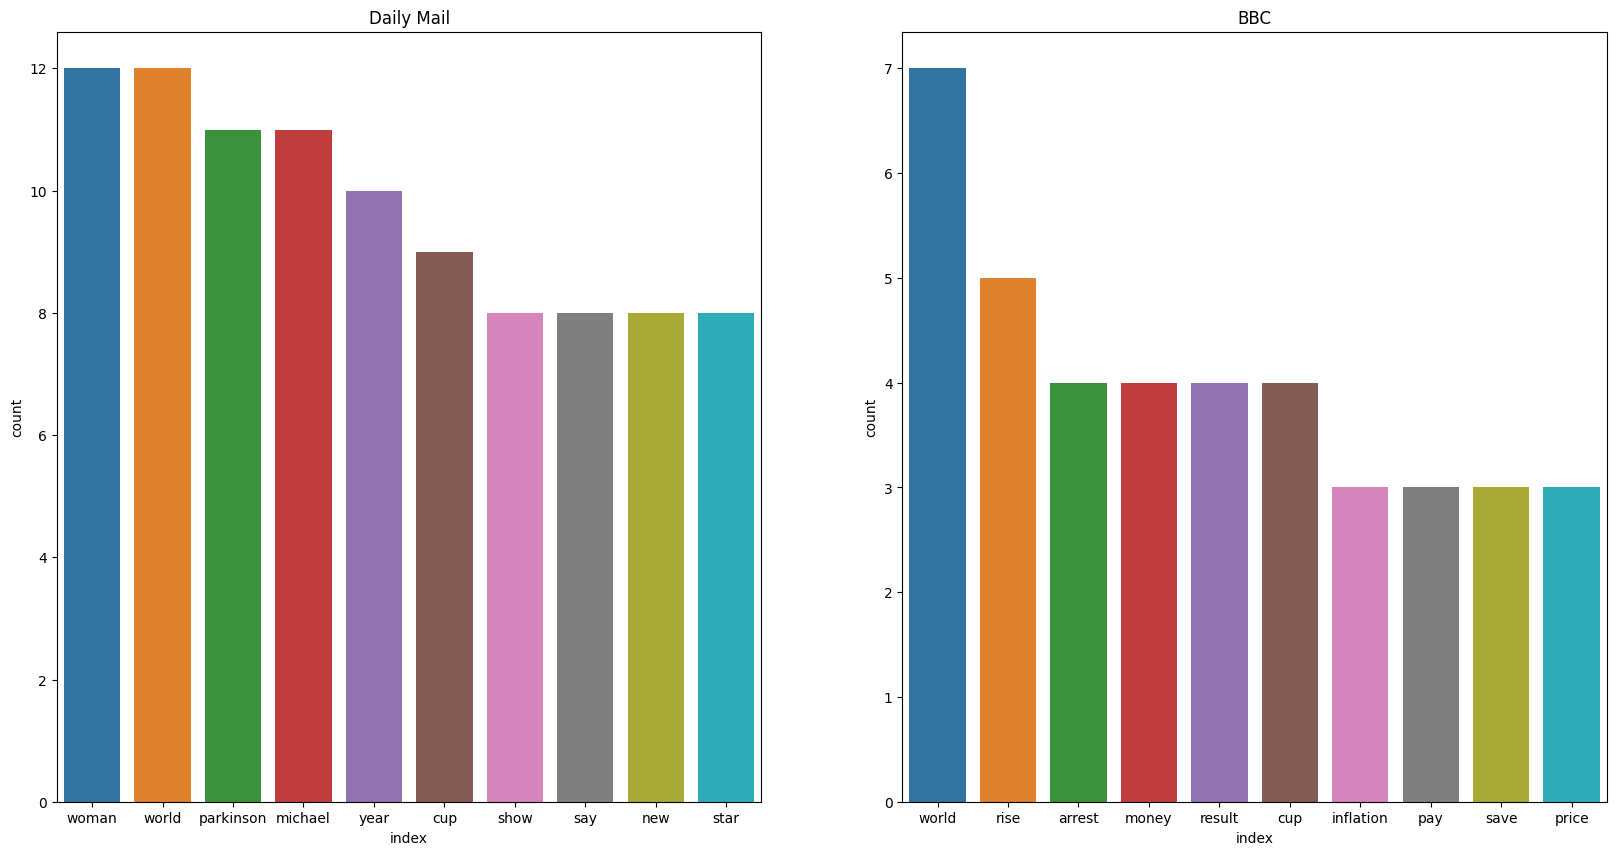

In [19]:
# Select the top ten of each

dm_top_ten = dm_keyword_counts.reset_index()[:10]
bbc_top_ten = bbc_keyword_counts.reset_index()[:10]

# Then graph them

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(dm_top_ten, x="index", y="count", ax=ax[0]).set(title='Daily Mail')
sns.barplot(bbc_top_ten, x="index", y="count", ax=ax[1]).set(title='BBC')